<a href="https://colab.research.google.com/github/JollygreenG-10/E-commerce-shipping-ML/blob/main/Final_project_6100_Vfinal_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**E-Commerce Shipping Data Analysis** 


> MDS - DATA 6100 - Final Project - Fall 2022

> By: Adam Green - Pansy Ahmed

> To: Mihai Nica, Ph.D



# 1. Executive Summary
For the final project, an ecommerce dataset was selected from kaggle (https://www.kaggle.com/datasets/prachi13/customer-analytics).  The dataset contains approximately **11,000 observations across 12 variables**. The data describes purchase information for products ordered using an e-commerce website including among other features, gender descriptors of the individual making the purchase as well as the item being purchased. 

The **target variable within this dataset is a binomial variable denoting whether or not the specificied order arrived on time (0/1).** We would like to note that we selected a relatively straightforward dataset as we wanted the focus of our project to be model building rather than dataset manipulation and cleaning.

The cleaning process completed prior to model building included the following steps:
1. Initial data exploration and finding NAs
2. Standardized continuous variables.
3. Label-encoded the product importance variable(low 1/medium 2/high 3)
4. Created dummy variables for all categorical variables
5. Split data into training, validation and test sets as well as feature and label dataframes of the proper shape for our purposes.

**Note -** While NA values were explored, the dataset was found to be complete, thus, no cleaning of NA values was required.

In our approach to this problem, after appropriate data cleaning, we created five final models using varied approaches. 


> K- Nearest Neighbor

> Support Vector Machine

> Lasso with Logisitic Regression

> Neural Networks using Keras

> Neural Networks with manual configuration

While the first 3 approaches used machine learning models for classifications.The last 2 models were implemented by using deep learning approach building **neural networks** using the tensorflow keras package initially then through manual configuration through trial and error testing. The aim of the final model is to form a neural network that has greater flexibility in the ability to optimize compared to the keras model. 

Through the formation of these five models, a number of different feature selection and hyper-parameter combinations were tested using a held-out validation set, before the best version of each model is taken and tested on the final test data.

Accuracy results based on a held-out test set were compared to understand the strengths and weaknesses of each.  Each of these models was evaluated for its accuracy in predicting whether or not a package arrived on time across test data. Further analysis of the best model for various use cases was also completed based on interpretability and practicality of each model. 

**According to the order of listing of models in this project, the best accuracy scores for each model was:**
1. KNN: 68%
2. SVM: 65.2%
3. Lasso with Logisitc Regression: 66.8%
4. Keras Neural Network: 68.3%
5. Neural Network from Scratch: 67.2%

Additionally, while the data used in this assignment was pulled from kaggle, it was not part of a competition. For this reason, **no Kaggle submission scores are available and model evaluation was instead completed using held-out test data.**

# 2.Ethical Analysis
The dataset under examination was retrieved from kaggle and pertains to shipping data for a range of orders on an e-commerce platform.  The data explanation provides **no indication of the location of orders within the dataset or which e-commerce platform the data was taken from.** With these characteristics in mind, the **first ethical issue** apparent in the analysis of this data is that **it appears some cleaning processes have already been applied to the dataset prior to the upload on Kaggle.** This is indicated by the lack of NA values present in the data.  **This is an issue as there is no direction given by the data's owner as to what cleaning was completed.**  As a result, it is possible that the changes applied by the owner of the data made **changes that introduced bias into the dataset and is therefore passed into the models we produced.**
  
  Additionally, ethical issues arise in **the use of neural networks for prediction tasks.**  The use of neural networks introduces the issue of the **"black box" with researchers not being able to define the exact parameters by which the network comes to a conclusion.**  As a result, ethical issues arise as the model could rely on implicit biases present in the data without the knowledge of the researchers.  Additionally, extensions and interpretations of the network are compromised as the importance of individual parameters in the model is unclear. The potential for ethical issues is greatly increased when users of the model are unaware of what is truly going on "under the hood".

  Finally, **this data was found to not lend itself well to machine learning problems (poor overall predictive power of the response variable using independent variables).** As a result, the models formed have generally **poor accuracy.** Use of these models or inferences made regarding parameters could be highly inaccurate if the user does not have a clear intension of how to use interpretations of the models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from time import time
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
import scipy
import h5py as hp
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector as sfs
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

uploaded = files.upload()

Saving Train.csv to Train.csv


# Detailed Report

## 3. Cleaning and Preproccessing

### 3.1 Preprocessing
After loading the necessary libraries, preprocessing was completed. The first step of this process was the initial visualizations and views of the dataset to determine covariate distributions, presence of NA's, unnecessary covariates, covariate data types and potential variables that could be derived from what is currently held in the data. 

After this, we label encoded ordinal variables, dummy encoding categorical variables, and standardizing continuous variables. The dataset was also split into training and test sets in addition to forming "feature" and "labels" groupings to create a standalone series to represent the response variable.

  Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  weight  
0                44    1233  
1                59    3088  
2                48    3374  
3       

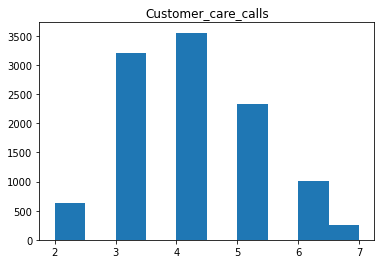

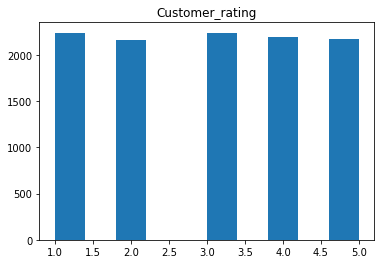

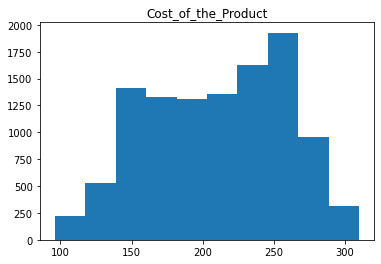

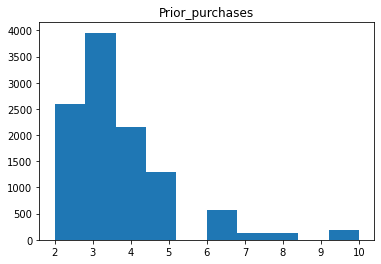

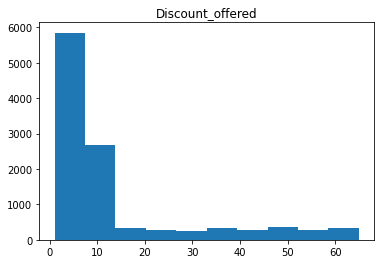

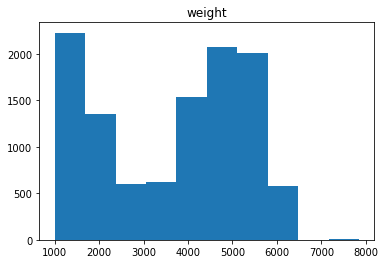

In [ ]:
#Read data and generate initial summaries of variables
data = pd.read_csv("Train.csv")
data.rename(columns = {"Reached.on.Time_Y.N": "on_time", "Weight_in_gms": "weight"}, inplace = True)
# storing the y for the first 9900 records on_time values into labels
labels = data["on_time"]
data = data.drop(["on_time", "ID"], axis =1)
#Create labels for neural network as ndarray


print(data.head())
data.info()

#Generate information related to variable distributions
print(data.describe())
cont_cols = []
for i in data.columns:
  if data[i].dtype == 'int64' or data[i].dtype == 'float64':
    cont_cols.append(i) 
# plotting histograms for continous variables
for feat in cont_cols:
  plt.hist(data[feat])
  plt.title(feat)
  plt.show()

In [ ]:
#Count NAs and Zeros in columns
for i in data.columns:
  na_count = data[i].isna().sum()
  print(f"There are {na_count} NA values in {i}")
  print(f"there are {len(data[i]) - np.count_nonzero(data[i])} zeros in this column" )

There are 0 NA values in Warehouse_block
there are 0 zeros in this column
There are 0 NA values in Mode_of_Shipment
there are 0 zeros in this column
There are 0 NA values in Customer_care_calls
there are 0 zeros in this column
There are 0 NA values in Customer_rating
there are 0 zeros in this column
There are 0 NA values in Cost_of_the_Product
there are 0 zeros in this column
There are 0 NA values in Prior_purchases
there are 0 zeros in this column
There are 0 NA values in Product_importance
there are 0 zeros in this column
There are 0 NA values in Gender
there are 0 zeros in this column
There are 0 NA values in Discount_offered
there are 0 zeros in this column
There are 0 NA values in weight
there are 0 zeros in this column


As no NA values existed in the dataset, no further processing is needed to handle such values, greatly simplifying the cleaning process.

### 3.2 Standardize the Data
Data was standardized using the standard scaler function from sklearn.  This process was completed to allow direct comparisons between model parameters as well as improve the function of models.

In [ ]:
#Standardize continuous variables to reduce scaling difference
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

#define function to implement scaler function
def scale_data(data):  
  continuous = []
  for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
      continuous.append(col)
  for entry in continuous:
    data[entry] = SC.fit_transform(data[[entry]])
  return data

data = scale_data(data)

### 3.3 Feature Encoding
Feature encoding was completed to handle categorical variables.  The product importance variable was label encoded to preserve order of the levels of the variable while all other categorical features were dummy encoded.

In [ ]:
#Encode ordinal variable using dictionary
ordinal_dict = {"low" : 1, "medium": 2, "high" : 3} 
data["Product_importance"] = data["Product_importance"].map(ordinal_dict)

#create dummy variables for all other categorical columns
data = pd.get_dummies(data)

print(data.head())

   Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0            -0.047711        -0.700755            -0.690722        -0.372735   
1            -0.047711         1.421578             0.120746        -1.029424   
2            -1.799887        -0.700755            -0.565881         0.283954   
3            -0.923799         0.006689            -0.711529         0.283954   
4            -1.799887        -0.700755            -0.545074        -0.372735   

   Product_importance  Discount_offered    weight  Warehouse_block_A  \
0                   1          1.889983 -1.468240                  0   
1                   1          2.815636 -0.333893                  0   
2                   1          2.136824 -0.159002                  1   
3                   2         -0.208162 -1.502484                  0   
4                   2          2.013404 -0.703244                  0   

   Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \

### 3.4 Pairs Plot to Analyze Class Distributions
Pairwise plots were formed to view relationships and distributions of variables.  Additionally, based on the plots involving the weight variable, an additional column was added to the dataset to represent the square of the weight.  This decision was made as it appeared products at the lower and upper extremes of weight were generally delivered late.  The goal of the new column was to alter this pattern so that the upper and lower extremes became only upper extremes.  The result was positive with the new variable increasing the accuracy of the logisitic regression model.

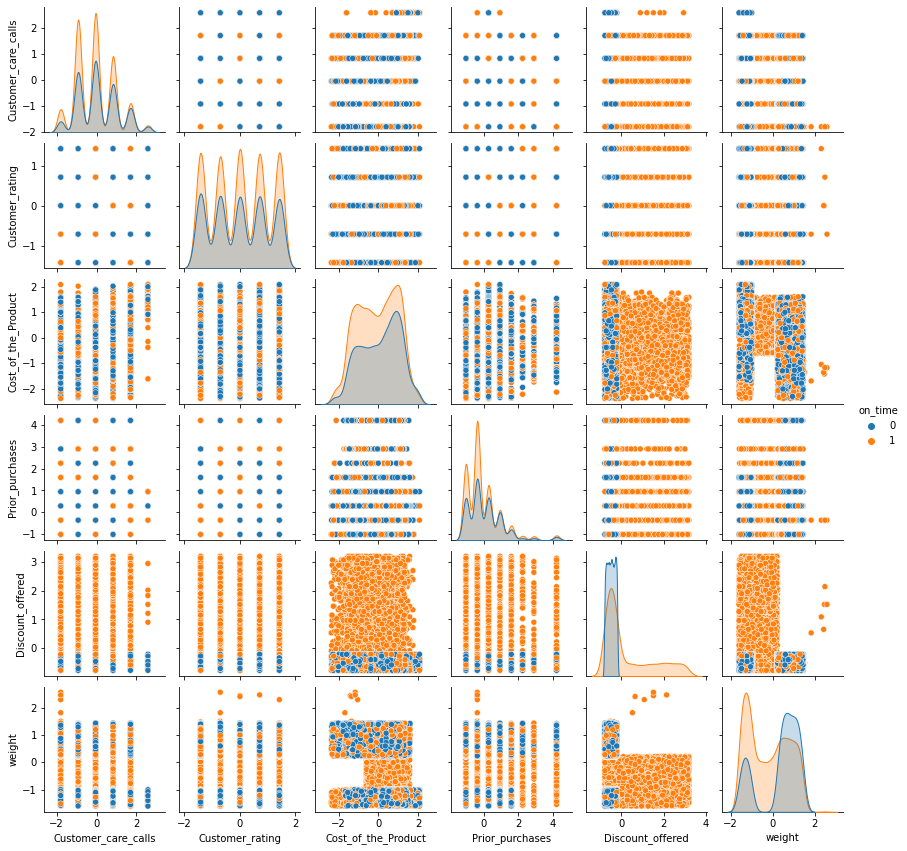

In [ ]:
#PairsPlot to analyse variable relations
plot_data = data
plot_data['on_time'] = labels
my_vars = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'weight']

fig_height = 2
sns.pairplot(plot_data, vars=my_vars, hue= "on_time", dropna=True,height=fig_height)

data = data.drop(['on_time'], axis=1)

### 3.5 Divide the Data into Training and Test Sets

In the code below, data is divided manually into training and test sets which represent 90% and 10% of the original data, respectively. Additionally, versions of the training and test data were created as arrays to be passed into the neural network created from scratch 

In [ ]:
#Split into training and test sets
X, x_test, Y, y_test = train_test_split(data, labels, test_size = 0.1, random_state = 2)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1, random_state = 3)

print("Shape of new dataframes - {} , {}, {}".format(x_train.shape, x_val.shape, x_test.shape))

print("Shape of new dataframes - {} , {}".format(y_train.shape, y_val.shape, y_test.shape))

#convert dataframes to arrays for purposes of the neural network
labs_test_nn = y_val.values.reshape(x_val.shape[0], 1)
labs_nn = y_train.values.reshape(x_train.shape[0], 1)
nn_train = pd.DataFrame.to_numpy(x_train)
nn_test = pd.DataFrame.to_numpy(x_val)

labs_final_test = y_test.values.reshape(x_test.shape[0], 1)
nn_final_test = pd.DataFrame.to_numpy(x_test)


Shape of new dataframes - (8909, 17) , (990, 17), (1100, 17)
Shape of new dataframes - (8909,) , (990,)


##**Analysis Implementations through Machine Learning**

## 4 K-Nearest Neighbors Models

In the model below, we first attempt to find the best K for our model. Intrestingly it has not been consistent every time we ran the code, and the percision scores tended to fluctuate between 68% -65%  as well as the Ns ranging from 10-29 at times.
We will then compare the percision scores by running the model on all features, then using the RFE features and lastly by applying PCA.

### 4.1 Checking error trend to determine K

In [ ]:
#generate error trend using KNN classifier to determine ideal K value
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,40):
   classifier_KNN = KNeighborsClassifier(n_neighbors=i)
   classifier_KNN.fit(x_train, y_train)
   pred_i=classifier_KNN.predict(x_val)
   error_rate.append(np.mean(pred_i!=y_val))

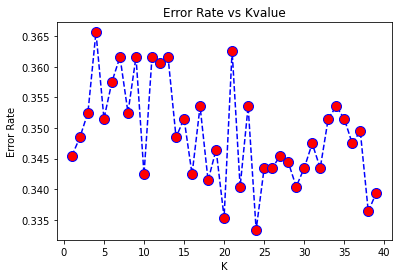

From the error plot above, the lowest error seems to generate when error = 0.3333333333333333


In [ ]:
#plot the error trend
plt.plot(range(1,40), error_rate, color='blue', linestyle= 'dashed', marker = 'o', markerfacecolor='red', markersize =10)
plt.title('Error Rate vs Kvalue')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print('From the error plot above, the lowest error seems to generate when error =',min(error_rate))

### 4.2 Using the best K value for model training with the overall features

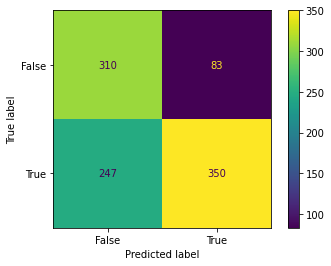

The accuracy for the KNN model using all features is: 0.6666666666666666


In [ ]:
#Train and evaluate the KNN model
from sklearn import metrics
classifier_KNN = KNeighborsClassifier(n_neighbors=24)
classifier_KNN.fit(x_train, y_train)
y_pred_KNN=classifier_KNN.predict(x_val)
confusion_matrix_KNN = metrics.confusion_matrix(y_val, y_pred_KNN)
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_KNN, display_labels= [False, True])
cm_display.plot()
plt.show()
Accuracy_KNN = metrics.accuracy_score(y_val, y_pred_KNN)
print('The accuracy for the KNN model using all features is:',Accuracy_KNN)

### 4.3 KNN Using Reduced Feature Set from RFE
Based on the recursive feature elimination process provided in the SVM model, training, validation and test sets with reduced features were created and used to train a second KNN model. 

In [ ]:
#Creating a training,test and verification sets with the selected features: 
selfeatures_xtrain = x_train[['Discount_offered', 'weight', 'Customer_care_calls', 'Warehouse_block_B', 'Gender_F','Prior_purchases', 'Product_importance', 'Warehouse_block_C', 'Mode_of_Shipment_Road']]
selfeatures_xtest = x_val[['Discount_offered', 'weight', 'Customer_care_calls', 'Warehouse_block_B', 'Gender_F','Prior_purchases', 'Product_importance', 'Warehouse_block_C', 'Mode_of_Shipment_Road']]
selfeatures_verify= x_test[['Discount_offered', 'weight', 'Customer_care_calls', 'Warehouse_block_B', 'Gender_F','Prior_purchases', 'Product_importance', 'Warehouse_block_C', 'Mode_of_Shipment_Road']]

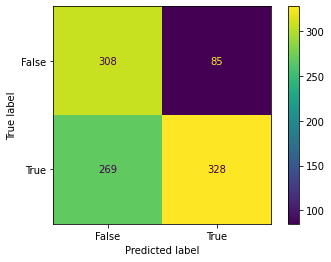

The accuracy for the KNN model using RFE is: 0.6424242424242425


In [ ]:
#Train and evaluate the KNN model
classifier_KNN_RFE = KNeighborsClassifier(n_neighbors=4)
classifier_KNN_RFE.fit(selfeatures_xtrain, y_train)
y_pred_KNN_RFE=classifier_KNN_RFE.predict(selfeatures_xtest)
confusion_matrix_KNN_RFE = metrics.confusion_matrix(y_val, y_pred_KNN_RFE)
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_KNN_RFE, display_labels= [False, True])
cm_display.plot()
plt.show()
Accuracy_KNN_RFE = metrics.accuracy_score(y_val, y_pred_KNN_RFE)
print('The accuracy for the KNN model using RFE is:',Accuracy_KNN_RFE)

###4.4 KNN Using PCA for Feature Reduction

In this section we implement Principal Component Analysis to reduce the dimensionality of the dataset and see how that can assist with getting better accuracy on our predictions with KNN.

In [ ]:
#Reducing the features using PCA
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca= pca.transform(x_val)

In [ ]:
#Implementing KNN using PCA features
PCA_error_rate=[]
for i in range(1,40):
   classifier_KNN_PCA = KNeighborsClassifier(n_neighbors=i)
   classifier_KNN_PCA.fit(x_train_pca, y_train)
   pred_i=classifier_KNN_PCA.predict(x_test_pca)
   PCA_error_rate.append(np.mean(pred_i!=y_val))

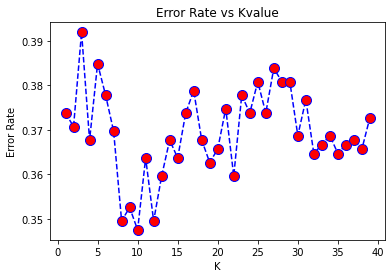

From the error plot above, the lowest error seems to generate when error = 0.3333333333333333


In [ ]:
#Plot the error trend to determine ideal K value
plt.plot(range(1,40), PCA_error_rate, color='blue', linestyle= 'dashed', marker = 'o', markerfacecolor='red', markersize =10)
plt.title('Error Rate vs Kvalue')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print('From the error plot above, the lowest error seems to generate when error =',min(error_rate))

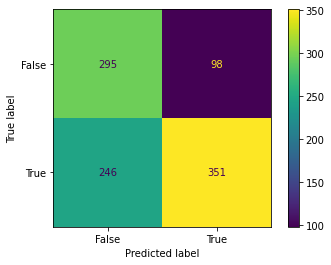

The accuracy for the KNN model is: 0.6525252525252525


In [ ]:
#train and evaluate the KNN classifier
classifier_KNN_PCA = KNeighborsClassifier(n_neighbors=10)
classifier_KNN_PCA.fit(x_train_pca, y_train)
y_pred_KNN_PCA=classifier_KNN_PCA.predict(x_test_pca)
confusion_matrix_KNN_PCA = metrics.confusion_matrix(y_val, y_pred_KNN_PCA)
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_KNN_PCA, display_labels= [False, True])
cm_display.plot()
plt.show()
Accuracy_KNN_PCA = metrics.accuracy_score(y_val, y_pred_KNN_PCA)
print('The accuracy for the KNN model is:',Accuracy_KNN_PCA)

### 4.5 **Summary of KNN scores**:
1.   Using all features: 66.6%
2.   Using RFE results with 9 features:64.24%
3.   Using PCA: 65.25%

While previous runs yielded around 68% for all features, the range of difference between the 3 approaches has been within +/-2% percision. In this model, using all features has yielded the best scores for prediciton, although overall still relatively low for making reliable predicitons as dependable model.


##5.Support Vector Machine Model

### 5.1 SVM Implenentation with Recursive Feature Elimination Method(RFE)

The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.
In this model, we have combined the Recursive Feature Elimitation method to select the most valuable features by ranking them, with the Support Vector Machine model.

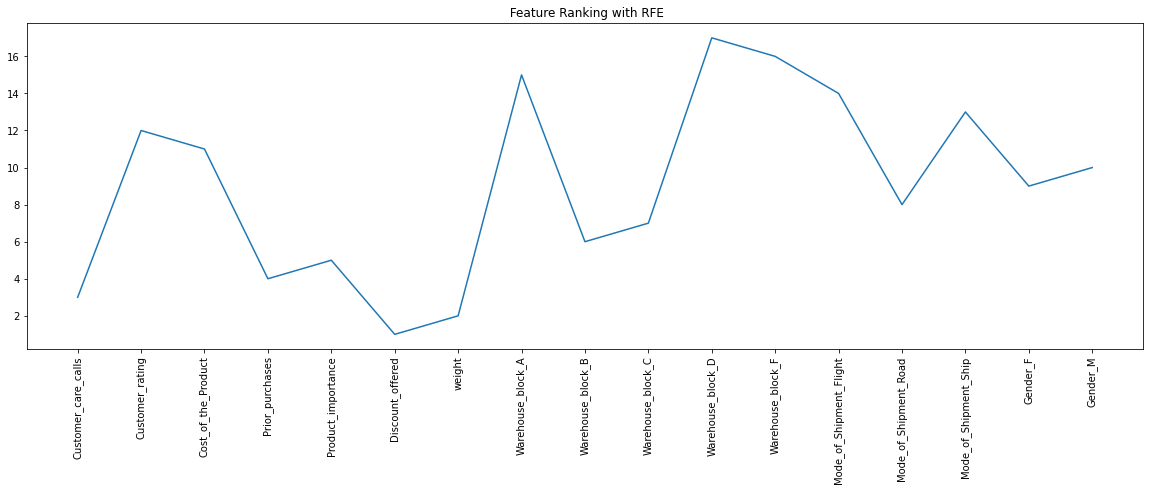

In [ ]:
#Importing the necessary libraries
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

#Initiating the SVM model while ranking the features
classifier_SVM_RFE= SVC(kernel ='linear', random_state = 0)
rfe=RFE(estimator=classifier_SVM_RFE, n_features_to_select=1, step=1)
rfe.fit(x_train, y_train)
ranking =rfe.ranking_
 
#Plotting the deduced ranking
fig, ax = plt.subplots(figsize=(20, 6))
plt.setp(ax.get_xticklabels(), rotation= 90) 
ax.plot(x_train.columns,ranking)
plt.title(" Feature Ranking with RFE")
plt.show()


In [ ]:
#storing the features and their rankings and sorting by rank for analysis
d ={'features':x_train.columns,'rank':ranking}
ranking_df = pd.DataFrame(d)
ranking_df=ranking_df.sort_values('rank',ascending=True)
print ('Features ranking :',ranking_df)

Features ranking :                    features  rank
5          Discount_offered     1
6                    weight     2
0       Customer_care_calls     3
3           Prior_purchases     4
4        Product_importance     5
8         Warehouse_block_B     6
9         Warehouse_block_C     7
13    Mode_of_Shipment_Road     8
15                 Gender_F     9
16                 Gender_M    10
2       Cost_of_the_Product    11
1           Customer_rating    12
14    Mode_of_Shipment_Ship    13
12  Mode_of_Shipment_Flight    14
7         Warehouse_block_A    15
11        Warehouse_block_F    16
10        Warehouse_block_D    17


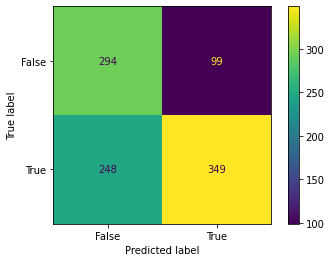

The accuracy for the SVM model is: 0.6494949494949495


In [ ]:
#Train and evaluate the SVM with RFE model 
classifier_SVM_RFE.fit(selfeatures_xtrain, y_train)
y_pred_SVM_RFE=  classifier_SVM_RFE.predict(selfeatures_xtest)

confusion_matrix_SVM_RFE = metrics.confusion_matrix(y_val, y_pred_SVM_RFE)
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_SVM_RFE, display_labels= [False, True])
cm_display.plot()
plt.show()
Accuracy_SVM_RFE = metrics.accuracy_score(y_val, y_pred_SVM_RFE)
print('The accuracy for the SVM model is:',Accuracy_SVM_RFE)

In [ ]:
#Generate coefficients list
feats = classifier_SVM_RFE.feature_names_in_
coefs = classifier_SVM_RFE.coef_.tolist()

coefs_dict = {}
for i in range(len(feats)):
  coefs_dict[feats[i]] = coefs[0][i]

print(coefs_dict)

{'Discount_offered': 0.9345663925829144, 'weight': -0.7403390380182662, 'Customer_care_calls': -0.08330391774798773, 'Warehouse_block_B': 0.06381521921105104, 'Gender_F': -0.03468608237601245, 'Prior_purchases': -0.08009574506261252, 'Product_importance': 0.07620005084538661, 'Warehouse_block_C': 0.043383432100085884, 'Mode_of_Shipment_Road': -0.039547960212644284}


### 5.2 SVM with Full Feature Set

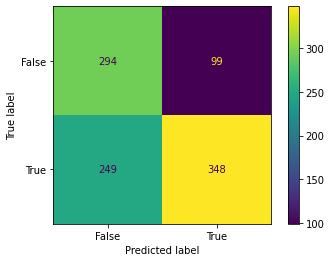

The accuracy for the SVM model is: 0.6484848484848484


In [ ]:
# prediciting with the SVM model
classifier_SVM= SVC(kernel ='linear', random_state = 0)
classifier_SVM.fit(x_train,y_train)
y_pred_SVM = classifier_SVM.predict(x_val)
confusion_matrix_SVM = metrics.confusion_matrix(y_val, y_pred_SVM)
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_SVM, display_labels= [False, True])
cm_display.plot()
plt.show()
Accuracy_SVM = metrics.accuracy_score(y_val, y_pred_SVM)
print('The accuracy for the SVM model is:',Accuracy_SVM)

In [ ]:
#Generate coefficients list
feats = classifier_SVM.feature_names_in_
coefs = classifier_SVM.coef_.tolist()

coefs_dict = {}
for i in range(len(feats)):
  coefs_dict[feats[i]] = coefs[0][i]

print(coefs_dict)

{'Customer_care_calls': -0.07650374947734839, 'Customer_rating': 0.021068572907432692, 'Cost_of_the_Product': -0.02325498975218865, 'Prior_purchases': -0.07986946910352444, 'Product_importance': 0.07310670548122289, 'Discount_offered': 0.9296390869384701, 'weight': -0.7437731342449652, 'Warehouse_block_A': -0.027656551028712784, 'Warehouse_block_B': 0.0428976641180725, 'Warehouse_block_C': 0.02078758794354485, 'Warehouse_block_D': -0.011148896612326098, 'Warehouse_block_F': -0.024879804420436358, 'Mode_of_Shipment_Flight': 0.015095525938932042, 'Mode_of_Shipment_Road': -0.03282022019834585, 'Mode_of_Shipment_Ship': 0.017724694259811713, 'Gender_F': -0.019268548167133304, 'Gender_M': 0.01926854816707646}


###5.3  Summary for SVM scores

For both implementations, there was not much enhancement in the percision score. The model using RFE has gained a slighlty better score at 64.9% while with using the full features it yielded 64.8%. The advantage here is that the first implementation with RFE only required half the number of features and did not negatively impact the score.

##6.Lasso with Logistic Regression
The code below was used to form a model that employed the lasso (L1 penalty) during model fitting for feature selection and model optimization.

### 6.1 Model Training 
Model training was completed using a **grid search method** to determine the ideal regularization and max iterations variables. Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy. 

In [ ]:
#Define a results function
def print_results(results):
    print("Best Params: {}/n".format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    std_devs = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, std_devs, results.cv_results_['params']):
        print('{} (+/- {}) for {}'.format(round(mean,3), round(std*2, 3), params))

#Prep the parameters grid for grid search
grid_dict = {"C":[0.01, 0.1, 1, 10, 50], "max_iter": [100, 200, 300, 400, 500]}

#model training and initial evaluation
lr = LogisticRegression(penalty = "l1", solver = "liblinear")
cv = GridSearchCV(lr, grid_dict, cv =5)
cv.fit(x_train, y_train)

print_results(cv)

best_model = cv.best_estimator_



Best Params: {'C': 0.01, 'max_iter': 500}/n
0.645 (+/- 0.021) for {'C': 0.01, 'max_iter': 100}
0.645 (+/- 0.021) for {'C': 0.01, 'max_iter': 200}
0.646 (+/- 0.022) for {'C': 0.01, 'max_iter': 300}
0.645 (+/- 0.022) for {'C': 0.01, 'max_iter': 400}
0.646 (+/- 0.022) for {'C': 0.01, 'max_iter': 500}
0.636 (+/- 0.015) for {'C': 0.1, 'max_iter': 100}
0.636 (+/- 0.015) for {'C': 0.1, 'max_iter': 200}
0.636 (+/- 0.015) for {'C': 0.1, 'max_iter': 300}
0.636 (+/- 0.015) for {'C': 0.1, 'max_iter': 400}
0.636 (+/- 0.015) for {'C': 0.1, 'max_iter': 500}
0.636 (+/- 0.017) for {'C': 1, 'max_iter': 100}
0.636 (+/- 0.017) for {'C': 1, 'max_iter': 200}
0.636 (+/- 0.017) for {'C': 1, 'max_iter': 300}
0.636 (+/- 0.017) for {'C': 1, 'max_iter': 400}
0.636 (+/- 0.017) for {'C': 1, 'max_iter': 500}
0.636 (+/- 0.016) for {'C': 10, 'max_iter': 100}
0.636 (+/- 0.016) for {'C': 10, 'max_iter': 200}
0.636 (+/- 0.016) for {'C': 10, 'max_iter': 300}
0.636 (+/- 0.016) for {'C': 10, 'max_iter': 400}
0.636 (+/- 0.01

### 6.2 Lasso Model Evaluation

In [ ]:
# creating a function to evaluate the model 
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred),3)
    precision = round(precision_score(labels, pred),3)
    recall = round(recall_score(labels, pred),3)
    print('{} -- accuracy score: {}, precision score: {}, recall score: {}, latency: {}ms'. format(name, accuracy, precision, recall, round((end-start)*1000, 1)))

best_model
evaluate_model("LR Lasso", best_model, x_val, y_val)

LR Lasso -- accuracy score: 0.635, precision score: 0.714, recall score: 0.66, latency: 14.1ms


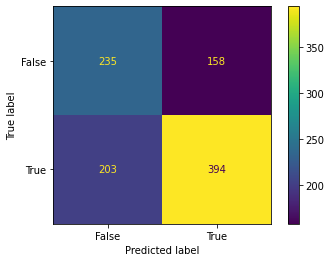

In [ ]:
#Model evaluation using confusion matrix
y_pred = best_model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
cmd.plot()
plt.show()

In [ ]:
#Generate coefficients list
feats = best_model.feature_names_in_
coefs = best_model.coef_.tolist()

coefs_dict = {}
for i in range(len(feats)):
  coefs_dict[feats[i]] = coefs[0][i]

print(coefs_dict)


{'Customer_care_calls': -0.06000307302526213, 'Customer_rating': 0.0, 'Cost_of_the_Product': -0.03709745268639223, 'Prior_purchases': -0.047894253925137895, 'Product_importance': 0.17913387827756308, 'Discount_offered': 1.2561344630669111, 'weight': -0.3173269505150047, 'Warehouse_block_A': 0.0, 'Warehouse_block_B': 0.0, 'Warehouse_block_C': 0.0, 'Warehouse_block_D': 0.0, 'Warehouse_block_F': 0.0, 'Mode_of_Shipment_Flight': 0.0, 'Mode_of_Shipment_Road': 0.0, 'Mode_of_Shipment_Ship': 0.0, 'Gender_F': 0.0, 'Gender_M': 0.0}


###6.3. Conclusion on Lasso:
From the coefficients listed above, it is apparent that use of the the lasso was effective in feature selection with 11 variables having their coefficients reduced to zero. 

Accuracy score: 63.5%

##**Analysis Implementations through Deep Learning**

## 7.Neural Networks for Classification
Two seperate neural networks were built and tested for the purposes of this problem. The first network was built using pre-established functions from the **keras package** while the second neural net was created generally **from scratch** to allow greater flexibility in tuning the network. 

### 7.1 Generating a neural network using the Keras package
The first mode, built using the **keras package from tensorflow** creates a neural network through specification of network layers before the network is compiled with user-selected specification related to the loss function and learning rate.  In this example, the loss function used was cross-entropy loss with a learning rate of 0.0001 and 200 epochs.  

Additionally, this model was built with **two hidden layers with sizes of 12 and 10 nodes** respectively. The final constraint placed on this model was an early stopping function that would end the learning process when no improvements in minimizing loss are made for 10 straight epochs. The specifications regarding the layout of the neural network were chosen based on trial and error.  Number of parameter combinations were tested with the most accurate version that was found specified below.

In [ ]:
#import necessary packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

#design layout of neural network
NN_1 = Sequential()
NN_1.add(Dense(12, input_shape = (17,), activation = "relu"))
NN_1.add(Dense(10, activation = "relu"))
NN_1.add(Dense(1, activation = "sigmoid"))



In [ ]:
#function to stop training when improvement is no longer made for 10 straight epochs
es = EarlyStopping(monitor='accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

#compile the network
NN_1.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.Adam(learning_rate=1e-4),  metrics = ["accuracy"])
#Train the network
history = NN_1.fit(x_train, y_train, epochs = 200, batch_size = 20, 
         callbacks = [es], verbose = 0, validation_split=0.2, shuffle = True)


### 7.2 Evaluation of the Keras Neural Network
Model evaluation was completed through creation of a accuracy plot to visualize change in training and test accuracy across epochs in addition to use of general accuracy, precision, and recall scores.

31/31 [==============================] - 0s 1ms/step
Neural Net 1 -- accuracy score: 0.673, precision score: 0.808, recall score: 0.6, latency: 212.5ms


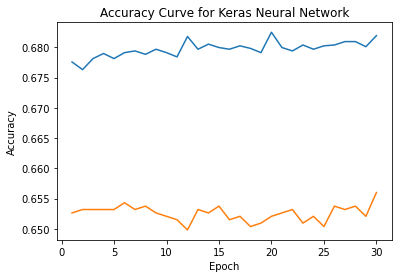

In [ ]:
#plot the accuracy learning curve
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label = "Training Accuracy")
plt.plot(epochs, val_accuracy, label = "Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve for Keras Neural Network")

#evaluate the model
def evaluate_model2(name, model, features, labels):
    start = time()
    pred = (model.predict(features)>0.5).astype(int)
    end = time()
    accuracy = round(accuracy_score(labels, pred),3)
    precision = round(precision_score(labels, pred),3)
    recall = round(recall_score(labels, pred),3)
    print('{} -- accuracy score: {}, precision score: {}, recall score: {}, latency: {}ms'. format(name, accuracy, precision, recall, round((end-start)*1000, 1)))

evaluate_model2("Neural Net 1", NN_1, x_val, y_val)




31/31 [==============================] - 0s 1ms/step


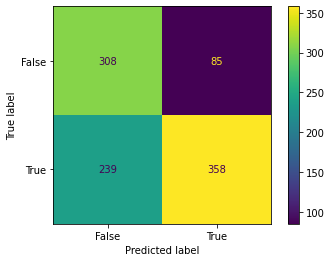

In [ ]:
#confusion matrix
y_pred = (NN_1.predict(x_val)>0.5).astype(int)
cm = confusion_matrix(y_val, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
cmd.plot()
plt.show()

### 7.3 Neural Network from Scratch

In reviewing online resources as well as examples depicted in class, it was found that the most concise and organized form by which to create the neural network from scratch is through using a class to define the network and include all methods necessary to train, fit and predict using the network.  The resulting class definition is below. it should be noted that the **loss function used in this network was negative log liklihood with a default learning rate of 0.00001 and 100 epochs.** The structure of this network included just **one hidden layer** compared to the keras network that used two. The activation function used in hidden layer of this network was Relu. The functions used in this network were based on neural network examples provided on the course GitHub as well as an online tutorial pertaining to classification using a neural net (available in the references section), and adapted to fit the needs of the problem at hand.

In [ ]:
# Write the neural net class 
class Neural_Net():
  #initialize the class
  def __init__(self, layers = [17,12,1], learning_rate = 0.00001, iterations = 100):
    #below are the general parameters requiring specification wihtin the neural net
    self.params = {}
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.layers = layers
    self.loss = []
    self.X = None
    self.Y = None
  #define the sigmoid function to be used as the activation function of the output layer
  def sigmoid(self,x):
    z = 1/(1+np.exp(-x))
    return z
  #define the relu function to be used as the hidden layer activation function
  def relu(self, k):
    j = np.maximum(k,0)
    return j

  #create a function to calculate the derivative of the relu function, to be used during back propogation
  def dRelu(self, k):
    k[k<=0] = 0
    k[k>0] = 1
    return k
  
  #define function to convert all zeroes to non-zero small values to avoid issues when taking log
  def ret_non_zero(self, v):
    ret_val = 0.000000000000001
    return np.maximum(v, ret_val)

  #set initial values for weights and biases using random numbers
  def init_wb(self):
    np.random.seed(25)
    self.params["w1"] = np.random.randn(self.layers[0], self.layers[1])
    self.params["b1"] = np.random.randn(self.layers[1], )
    self.params['w2'] = np.random.rand(self.layers[1], self.layers[2])
    self.params['b2'] = np.random.randn(self.layers[2], )


  #Define the loss function, here we use negative log liklihood as the loss function
  def loss_func(self, Y, Yhat):
    n = len(Y)
    yhat_inv = 1 - Yhat
    yhat = self.ret_non_zero(Yhat)
    yhat_inv = self.ret_non_zero(yhat_inv)
    y_inv = 1 - Y
    loss = -1/n * (np.sum(np.multiply(np.log(yhat), Y) + np.multiply((y_inv), np.log(yhat_inv))))
    return loss
  
  #Define the forward propogation function used to move forward through the network
  def forward_prop(self):
    
    R1 = self.X.dot(self.params['w1']) + self.params["b1"]
    A1 = self.relu(R1)
    R2 = A1.dot(self.params["w2"]) + self.params["b2"]
    A2 = self.sigmoid(R2)

    loss = self.loss_func(self.Y, A2)

    self.params["R1"] = R1
    self.params["R2"] = R2
    self.params["A1"] = A1

    return A2, loss

  #Define the back propogation function to adjust weights and biases based on the learning of the model
  def back_prop (self, A2):
    y_inv = 1 - self.Y
    yhat_inv = 1 - A2

  #calculate derivatives with respect the functions used at each step of the network
  #derivative calculations were 
    dd_wrt_yhat = np.divide(y_inv, self.ret_non_zero(yhat_inv)) - np.divide(self.Y, self.ret_non_zero(A2))
    dd_wrt_sig = A2 * yhat_inv
    dd_wrt_r2 = dd_wrt_yhat * dd_wrt_sig

    dd_wrt_A1 = dd_wrt_r2.dot(self.params["w2"].T)
    dd_wrt_w2 = self.params["A1"].T.dot(dd_wrt_r2)
    dd_wrt_b2 = np.sum(dd_wrt_r2, axis = 0)

    dd_wrt_r1 = dd_wrt_A1 * (self.dRelu(self.params["R1"]))
    dd_wrt_w1 = self.X.T.dot(dd_wrt_r1)
    dd_wrt_b1 = np.sum(dd_wrt_r1, axis = 0)

    self.params['w1'] = self.params['w1'] - self.learning_rate * dd_wrt_w1
    self.params['w2'] = self.params['w2'] - self.learning_rate * dd_wrt_w2
    self.params['b1'] = self.params['b1'] - self.learning_rate * dd_wrt_b1
    self.params['b2'] = self.params['b2'] - self.learning_rate * dd_wrt_b2
  
  #define function to train neural net using combination of forward and back prop functions defined above
  def fit(self, X, Y):
    self.X = X
    self.Y = Y
    self.init_wb()
    for i in range(self.iterations):
      A2, loss = self.forward_prop()
      self.back_prop(A2)
      self.loss.append(loss)
  
  #define function to predict labels when provided a dataset of proper shape
  def predict(self, X):
    R1 = X.dot(self.params["w1"])+ self.params["b1"]
    A1 = self.relu(R1)
    R2 = A1.dot(self.params["w2"]) + self.params["b2"]
    A2 = self.sigmoid(R2)
    return (A2>0.5).astype(int)

  #model evaluation on precision, accuracy and recall
  def evaluate_model3(self, name, model, x_test, y_test):
    start = time()
    pred = model.predict(x_test).astype(int)
    end = time()
    accuracy = round(accuracy_score(y_test, pred),3)
    precision = round(precision_score(y_test, pred),3)
    recall = round(recall_score(y_test, pred),3)
    print('{} -- accuracy score: {}, precision score: {}, recall score: {}, latency: {}ms'. format(name, accuracy, precision, recall, round((end-start)*1000, 1)))
  
  #plot the loss curve
  def plot_loss(self, name):
    plt.plot(self.loss, label = name)
    plt.ylabel("CE Loss")
    plt.xlabel("Iteration")
    plt.title("Loss Plot for Neural Network Training")
    plt.legend(name)



### 7.4 Model training and evaluation
Below a series of neural netowrks are formed with various values used for the hidden layer size, learning rate and number of epochs.  Evaluation of the models includes a learning loss curve for each model as well as accuracy, precision and recall scores.  Overall, the network that performed best had a hidden layer size of **12 nodes with a learning rate of 0.0001 and 200 epochs.**  A number of other parameter combinations were also tested, however, the network defined as nn2 below was had the best overall outcome.

Neural Net 1 -- accuracy score: 0.637, precision score: 0.686, recall score: 0.735, latency: 0.8ms
Neural Net 2 -- accuracy score: 0.652, precision score: 0.96, recall score: 0.441, latency: 0.5ms
Neural Net 3 -- accuracy score: 0.644, precision score: 0.766, recall score: 0.591, latency: 0.5ms
Neural Net 4 -- accuracy score: 0.623, precision score: 0.69, recall score: 0.682, latency: 0.4ms


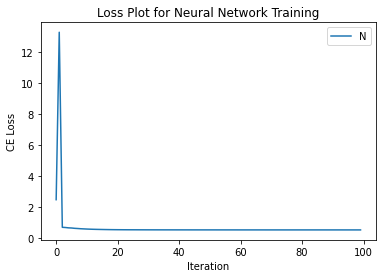

In [ ]:
#Train various versions of the neural network
neural_net = Neural_Net()
nn2 = Neural_Net(layers = [17,10,1], learning_rate = 0.001, iterations = 100)
nn3 = Neural_Net(layers = [17,12,1], learning_rate = 0.0001, iterations = 200)
nn4 = Neural_Net(layers = [17,10,1], learning_rate = 0.00001, iterations = 400)
neural_net.fit(nn_train, labs_nn)
nn2.fit(nn_train, labs_nn)
nn3.fit(nn_train, labs_nn)
nn4.fit(nn_train, labs_nn)

#plot the loss curve for the network with the best overall acuracy score
nn2.plot_loss("Neural Net 2")

#evaluate each of the models
neural_net.evaluate_model3("Neural Net 1", neural_net, nn_test, labs_test_nn)
neural_net.evaluate_model3("Neural Net 2", nn2, nn_test, labs_test_nn)
neural_net.evaluate_model3("Neural Net 3", nn3, nn_test, labs_test_nn)
neural_net.evaluate_model3("Neural Net 4", nn4, nn_test, labs_test_nn)



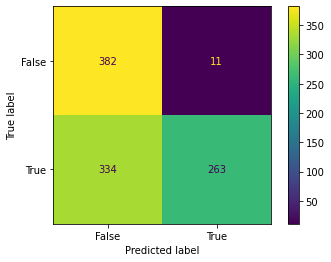

In [ ]:
#Confusion matrix
y_pred = nn2.predict(nn_test)
cm = confusion_matrix(labs_test_nn, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
cmd.plot()
plt.show()

## 8.Final Model Testing

In [ ]:
#@title 8.1 Verification for SVM models
#using all features
y_verify_SVM = classifier_SVM.predict(x_test)
Accuracy_verify_SVM_all = metrics.accuracy_score(y_test, y_verify_SVM)
print('The accuracy for the SVM model for all features is:',Accuracy_verify_SVM_all)

#using select features
y_verify_SVM_RFE=  classifier_SVM_RFE.predict(selfeatures_verify)
Accuracy_verify_SVM_select = metrics.accuracy_score(y_test,y_verify_SVM_RFE)
print('The accuracy for the SVM model with select features is:',Accuracy_verify_SVM_select)

The accuracy for the SVM model for all features is: 0.6545454545454545
The accuracy for the SVM model with select features is: 0.6545454545454545


In [ ]:
#@title 8.2 Verification for KNN models
# using all features
y_verify_KNN=classifier_KNN.predict(x_test)
confusion_matrix_KNN = metrics.confusion_matrix(y_test, y_verify_KNN)
Accuracy_verify_KNN = metrics.accuracy_score(y_test, y_verify_KNN)
print('The accuracy for the KNN modelfor all features is:',Accuracy_verify_KNN)

#using select features through RFE
y_verify_KNN_RFE=classifier_KNN_RFE.predict(selfeatures_verify)
confusion_matrix_KNN_RFE = metrics.confusion_matrix(y_test, y_verify_KNN_RFE)
Accuracy_verify_KNN_RFE = metrics.accuracy_score(y_test, y_verify_KNN_RFE)
print('The accuracy for the KNN model for select features using RFE is:',Accuracy_verify_KNN_RFE)

#using PCA
x_verify_pca= pca.transform(x_test)
y_verify_KNN_PCA=classifier_KNN_PCA.predict(x_verify_pca)
Accuracy_verify_KNN_PCA = metrics.accuracy_score(y_test, y_verify_KNN_PCA)
print('The accuracy for the KNN model for combined features using PCA is:',Accuracy_verify_KNN_RFE)


The accuracy for the KNN modelfor all features is: 0.68
The accuracy for the KNN model for select features using RFE is: 0.6527272727272727
The accuracy for the KNN model for combined features using PCA is: 0.6527272727272727


In [ ]:
#@title 8.3 Verification for Neural Networks
y_verify_nn1 = (NN_1.predict(x_test)>0.5).astype(int)
accuracy_nn1 = accuracy_score(y_test, y_verify_nn1)
print('The accuracy for the first neural network is:',accuracy_nn1)


y_verify_nn2 = nn2.predict(nn_final_test)
accuracy_nn2 = accuracy_score(labs_final_test, y_verify_nn2)
print('The accuracy for the second neural network is:',accuracy_nn2)

35/35 [==============================] - 0s 1ms/step
The accuracy for the first neural network is: 0.6827272727272727
The accuracy for the second neural network is: 0.6718181818181819


In [ ]:
#@title 8.4 Verification Lasso with Logisitic Regression
y_verify_lasso = best_model.predict(x_test)
accuracy_lasso = accuracy_score(y_test, y_verify_lasso)
print('The accuracy for the lasso model with logistic regression is:',accuracy_lasso)

The accuracy for the lasso model with logistic regression is: 0.6681818181818182


In [ ]:
#@title 8.5 Additional evaluation of top models
evaluate_model("KNN all features", classifier_KNN, x_test, y_test)

evaluate_model2("Keras NN", NN_1, x_test, y_test)

evaluate_model2("NN from scratch", nn2, x_test, y_test)

KNN all features -- accuracy score: 0.68, precision score: 0.787, recall score: 0.639, latency: 294.1ms
35/35 [==============================] - 0s 1ms/step
Keras NN -- accuracy score: 0.683, precision score: 0.829, recall score: 0.594, latency: 191.6ms
NN from scratch -- accuracy score: 0.672, precision score: 0.957, recall score: 0.474, latency: 12.7ms


# 9.Interpretations
After final testing of models on a **held-out test set, the general accuracy of all models was found to be in the range of 65% to 68%.**  While the models created for this problem do provide a predictive advantage over guessing randomly or selecting only one response (ie. all items predicted to arrive on time), the accuracy still remains low and it is difficult to determine whether there could be practical applications of these models without further tuning and a larger dataset for training. 

**The inaccuracies of our models indicate underlying issues with the dataset.** It is highly likely that the provided covariates do not have strong enough relationships with arrival status to form more accurate predictive models. A dataset with a greater number of observations across more variables such as package destination details and date of order could provide improved training and more accurate final predictions.


Regarding the model evaluation, **the most accurate methods, based purely on prediction accuracy, were the neural network built using the keras package and the K-nearest neighbors model generated using the full feature set.** These models had predictive accuracies of 68.2% and 67.4% respectively. For potential users of these models, solely prioritizing prediction would be best suited with the keras neural network, however, the models were evaluated further on their precision and recall scores. It was found that **the neural network built from scratch had significantly higher precision compared to other models at 95.7%.**  This means that users aiming to have the fewest on-time packages labelled as late would do best to use this network.  Further, users prioritizing labelling all late packages correctly would be best suited with the K-Nearest Neighbors approach which had a **recall score of 62.9%,** an improvement over other models.  

**While the most accurate model was the keras neural network, various use cases highlight strengths of other models. One must identify their priorities for classification accuracy before selecting a model to use in practice.**

Beyond comparison between models, only the lasso and SVM models produced interpretable coefficients. It was found that the lasso was successful in feature selection with 11 features having coefficients set to zero including mode of shipment, gender and customer rating. Of the non-zero coefficients, the discount offered variable had the greatest impact on the model with a coefficient of 1.25, while the absolute values of all other coefficients were below one. Similarily, both the SVM model with feature selection and with a full feature set identified discount offered as the variable with the greatest impact on the model. **It should also be noted that the features selected using the lasso differed greatly compared to those selected using recursive feature elimination. This likely resulted from the difference in approaches between SVM and lasso/logistic regression in model training.**

Overall, selection of the "best model" for this problem is largely dependent on the user and their needs.  **While the keras neural network was most accurate, the K-nearest neighbors approach would likely be best in practical situations as this model achieves an accuracy within 2% of the neural network with a modelling strategy that is more easily understood.** The complexity and low interpretability of the neural network makes it a poorer model when stakeholders are not fully familiar with statistics and machine learning principles.    

# 10.References

Keras Neural Network:
> https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Neural Network from Scratch:

> https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabfIndented 

Activation functions in neural networks:

> https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=An%20Activation%20Function%20decides%20whether,prediction%20using%20simpler%20mathematical%20operations.

SVM:
> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

> https://www.geeksforgeeks.org/support-vector-machine-algorithm/

KNN:
> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Lasso with logistic regression:
> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

> https://www.geeksforgeeks.org/grid-searching-from-scratch-using-python/




